In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
data1 = pd.read_excel("../resources/dataset/final_clean_data.xlsx", sheet_name="Clean_Candidate_Donor_data")



In [32]:
data2 = pd.read_excel("../resources/dataset/final_clean_data.xlsx", sheet_name="Clean_Donor_Data")

C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_23748\1876977127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre_', data=data1, palette='Set2')


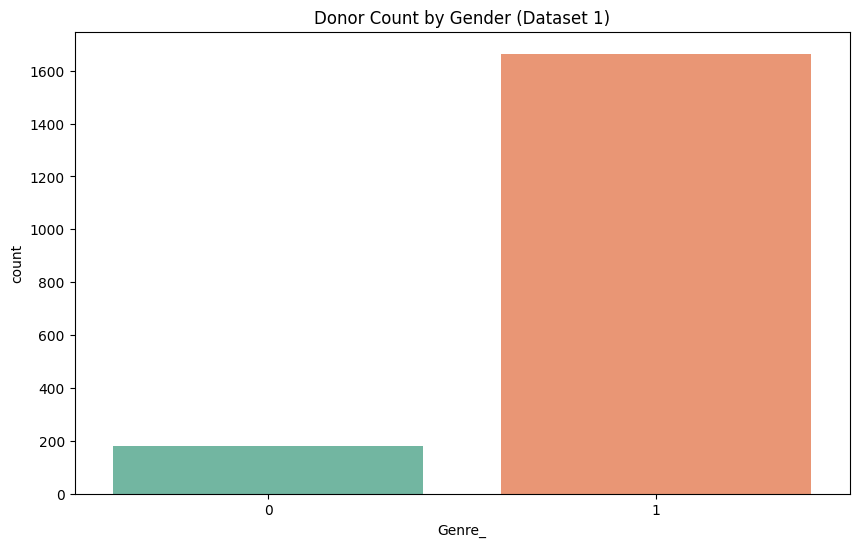

C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_23748\1876977127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Arrondissement_de_résidence_', data=data1, palette='Set2')


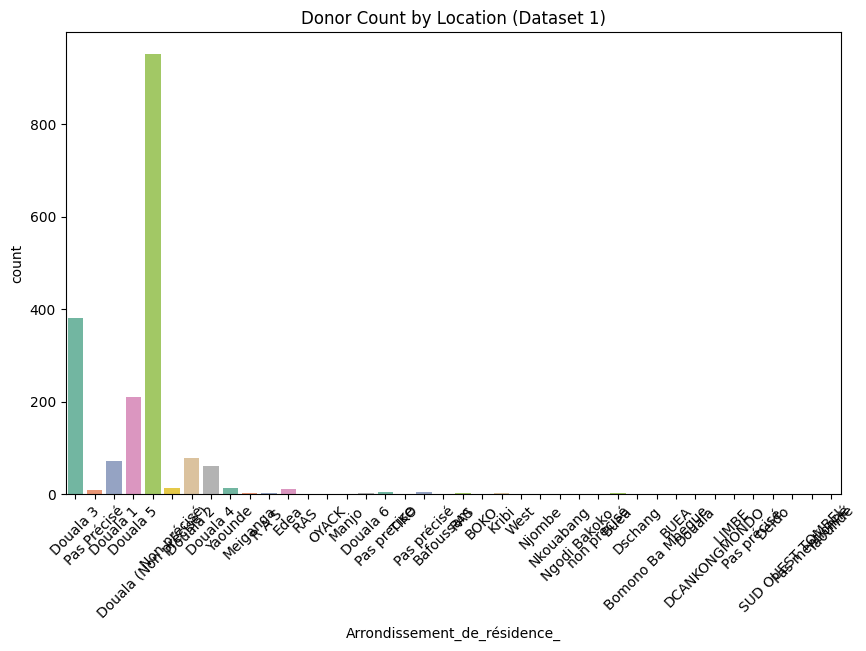

In [33]:
# Profiling Dataset 1
# Group donors by demographics (Age, Gender, etc.)
age_grouped = data1.groupby('Age')['ÉLIGIBILITÉ_AU_DON.'].mean()
gender_grouped = data1.groupby('Genre_')['ÉLIGIBILITÉ_AU_DON.'].mean()
location_grouped = data1.groupby('Arrondissement_de_résidence_')['ÉLIGIBILITÉ_AU_DON.'].mean()

# Visualize trends for Dataset 1
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre_', data=data1, palette='Set2')
plt.title('Donor Count by Gender (Dataset 1)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Arrondissement_de_résidence_', data=data1, palette='Set2')
plt.title('Donor Count by Location (Dataset 1)')
plt.xticks(rotation=45)
plt.show()

In [34]:
from sklearn.impute import SimpleImputer

X1 = data1[['Age', 'Genre_']]
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
X1_imputed = imputer.fit_transform(X1)
X1['Genre_'] = X1_imputed[:, 1]  # Update the imputed 'Genre_' values


C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_23748\3733328801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Genre_'] = X1_imputed[:, 1]  # Update the imputed 'Genre_' values


In [35]:
# Clustering (KMeans) on Age and Gender for Dataset 1
X = data1[['Age', 'Genre_']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [36]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data1['Cluster'] = kmeans.fit_predict(X_scaled)



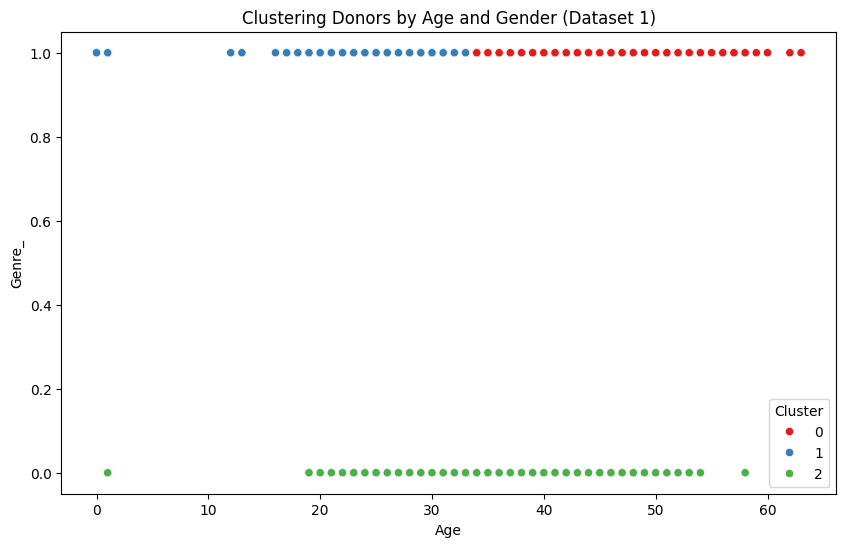

In [37]:
# Visualize clustering results for Dataset 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data1['Age'], y=data1['Genre_'], hue=data1['Cluster'], palette='Set1')
plt.title('Clustering Donors by Age and Gender (Dataset 1)')
plt.show()

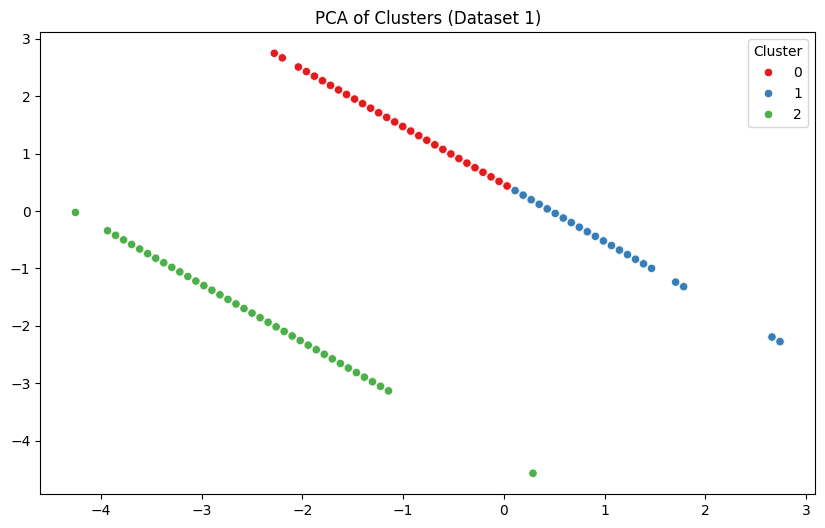

In [38]:
# PCA for Dataset 1
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Visualize PCA for Dataset 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data1['Cluster'], palette='Set1')
plt.title('PCA of Clusters (Dataset 1)')
plt.show()

In [39]:
data2.columns

Index(['Sexe', 'Age ', 'Type de donation ', 'Groupe Sanguin ABO / Rhesus ',
       'Phenotype ', 'Date'],
      dtype='object')

In [40]:
print(data2.columns.tolist())


['Sexe', 'Age ', 'Type de donation ', 'Groupe Sanguin ABO / Rhesus ', 'Phenotype ', 'Date']


In [41]:
data2.columns = data2.columns.str.strip()


C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_23748\894076217.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type de donation', data=data2, palette='Set2')


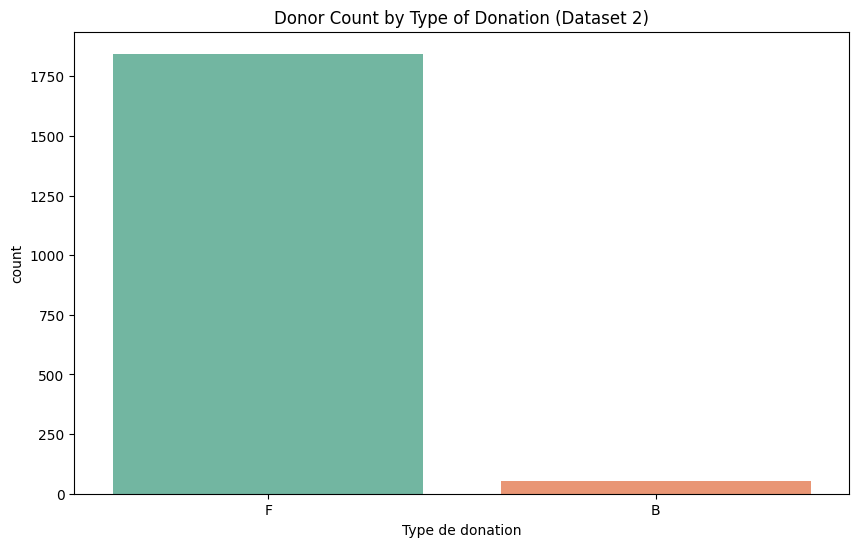

In [42]:
# Profiling Dataset 2
# Group donors by demographics (Age, Type of Donation, etc.)
age_grouped_2 = data2.groupby('Age')['Type de donation'].value_counts()

# Visualize trends for Dataset 2
plt.figure(figsize=(10, 6))
sns.countplot(x='Type de donation', data=data2, palette='Set2')
plt.title('Donor Count by Type of Donation (Dataset 2)')
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Type de donation' column
label_encoder = LabelEncoder()

# Fit and transform the column
data2['Type de donation_encoded'] = label_encoder.fit_transform(data2['Type de donation'])

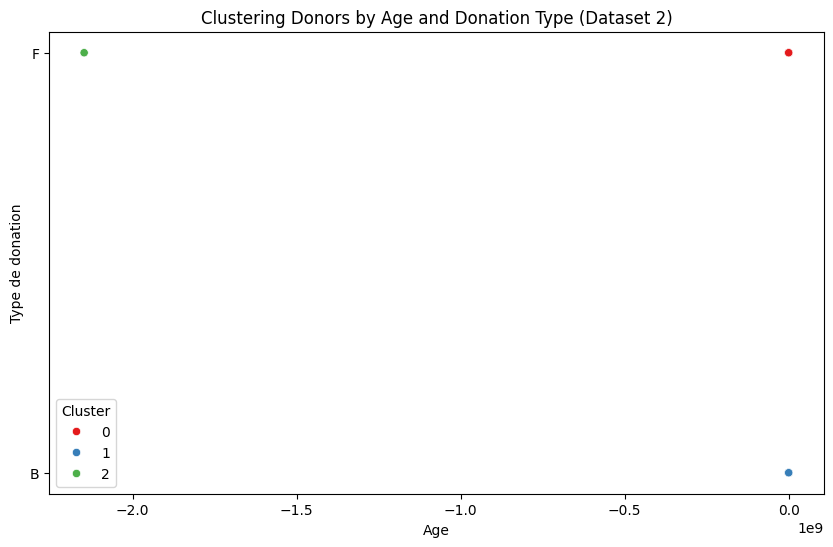

In [44]:
# Clustering (KMeans) on Age and Donation Type for Dataset 2
X_2 = data2[['Age', 'Type de donation_encoded']]
X_2_scaled = scaler.fit_transform(X_2)

# Apply KMeans clustering
kmeans_2 = KMeans(n_clusters=3, random_state=42)
data2['Cluster'] = kmeans_2.fit_predict(X_2_scaled)

# Visualize clustering results for Dataset 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['Age'], y=data2['Type de donation'], hue=data2['Cluster'], palette='Set1')
plt.title('Clustering Donors by Age and Donation Type (Dataset 2)')
plt.show()

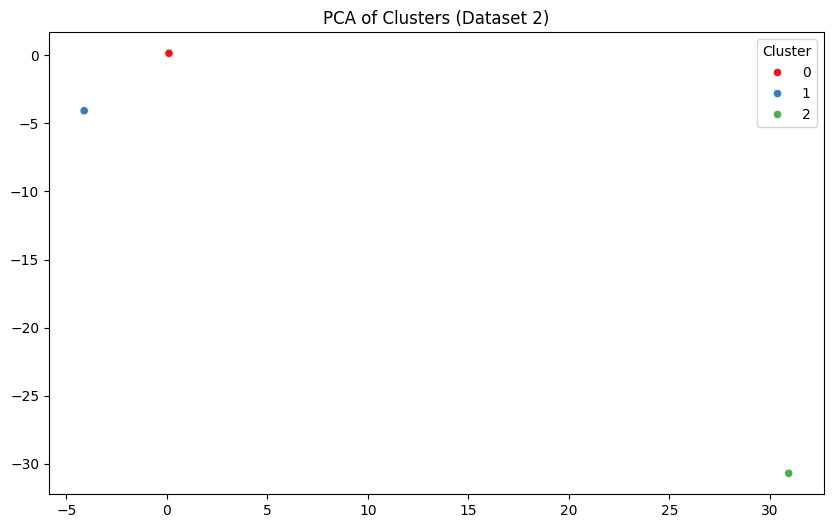

In [45]:
# PCA for Dataset 2
pca_2 = PCA(n_components=2)
pca_components_2 = pca_2.fit_transform(X_2_scaled)

# Visualize PCA for Dataset 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components_2[:, 0], y=pca_components_2[:, 1], hue=data2['Cluster'], palette='Set1')
plt.title('PCA of Clusters (Dataset 2)')
plt.show()

In [46]:
import streamlit as st
# **Save Results**
data1.to_csv("profiling_donors_results1.csv", index=False)
st.write(" Data saved successfully!")

2025-03-25 15:35:12.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 15:35:12.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 15:35:12.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 15:35:12.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [47]:
import streamlit as st
# **Save Results**
data2.to_csv("profiling_donors_results2.csv", index=False)
st.write(" Data saved successfully!")

2025-03-25 15:35:12.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 15:35:12.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 15:35:12.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 15:35:12.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
